# DATA CLEANING


### STEPS:
1. check for missing data
2. check for duplicates
3. check data type
4. outlier verification and treatment


In [130]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv('C:/Users/Oreva/Desktop/lecture/NYC.csv', header=0)

In [132]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [134]:
df["id"] = df["id"].astype(str)  # Convert ID to string  
df["host_id"] = df["host_id"].astype(str)  # Convert host_id to string  
df["last_review"] = pd.to_datetime(df["last_review"])  # Convert to date  


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  object        
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  object        
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [137]:
df.shape

(48895, 16)

In [138]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [139]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  object        
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  object        
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [140]:
# count no of missing values
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [141]:
# handle duplicates
df = df.drop_duplicates()
df.shape

(48895, 16)

<AxesSubplot:ylabel='price'>

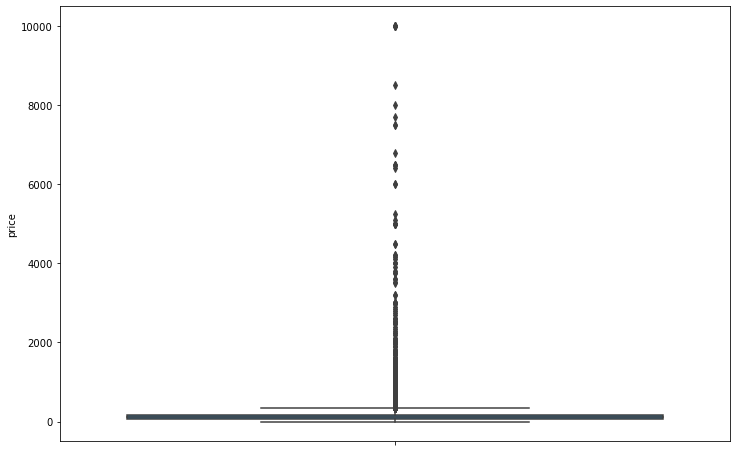

In [142]:
plt.figure(figsize=(12,8))
sns.boxplot(y='price',data=df)

<AxesSubplot:ylabel='minimum_nights'>

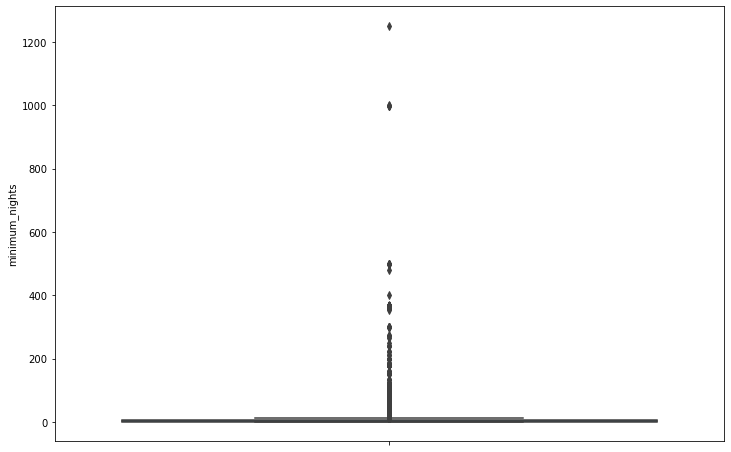

In [143]:
plt.figure(figsize=(12,8))
sns.boxplot(y='minimum_nights',data=df)

<AxesSubplot:ylabel='reviews_per_month'>

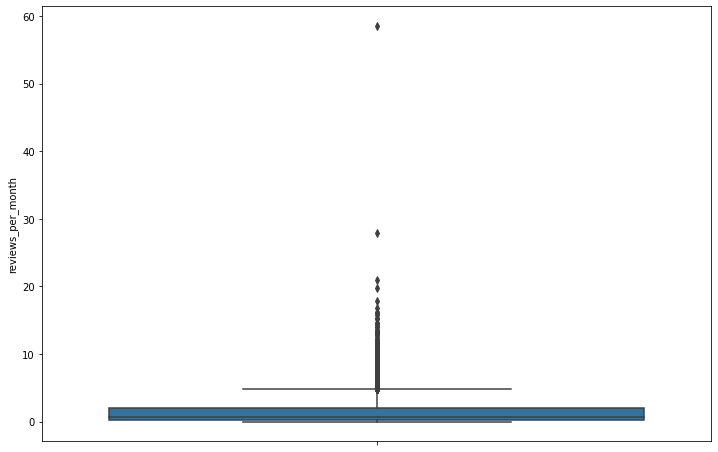

In [144]:
plt.figure(figsize=(12,8))
sns.boxplot(y='reviews_per_month',data=df)

<AxesSubplot:ylabel='number_of_reviews'>

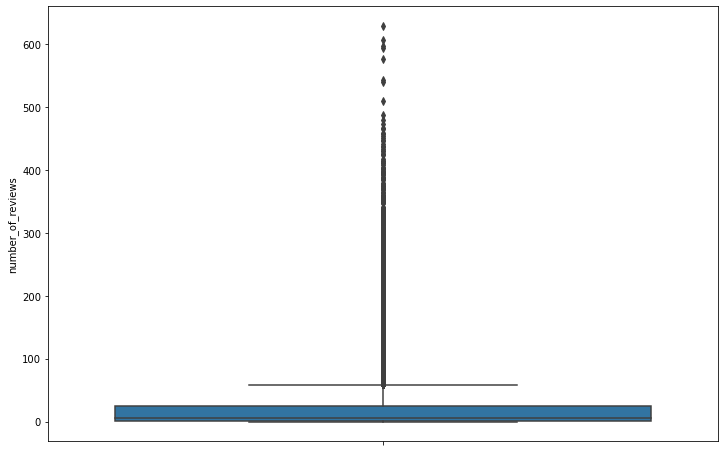

In [145]:
plt.figure(figsize=(12,8))
sns.boxplot(y='number_of_reviews',data=df)

In [147]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Observation
1. Missing values are in 4 columns
2. There are no duplicates
3. There are ouliers present in the price variable
4. There are outliers present in reveiw per month columns as it is not suppose to be greater than 31
5. There are ouliers present in minimum nights column as most listings don't require a full-year stay and values >365 days are present
6. There are also outliers present in the no of reviews column as there are extream high value count

### Handling Missing values

In [148]:
# Replacing the null values in the name column with the host name and room type 
df["name"] = df.apply(
    lambda row: f"{row['host_name']}'s {row['room_type']}" if pd.isnull(row["name"]) else row["name"], axis=1
)
print(df['name'].isnull().sum())

0


In [149]:
# checking host name colum
invalid_hostnames = df[df["host_name"].astype(str).str.match(r".*\d+.*")]
print(invalid_hostnames[["host_id", "host_name"]])


         host_id         host_name
2816     8362282        Drica 2017
3224     2765870        Amarie2131
10090   40694772            Data05
13667   18652590           Robert2
14147   56312532         Danoulo28
16811   15380275          Sierra64
18401   64065593      ResortShare5
18532   83586204           Doe2930
18582   64065593      ResortShare5
18905   64065593      ResortShare5
19110   64065593      ResortShare5
19111   64065593      ResortShare5
19112   64065593      ResortShare5
19216   64065593      ResortShare5
19952   64065593      ResortShare5
19984   64065593      ResortShare5
20027   64065593      ResortShare5
25555   64065593      ResortShare5
25650   64065593      ResortShare5
25740   64065593      ResortShare5
25825  100069033           Sarah-2
31178  182488531            Kevin4
32439   26490270           The 6o2
33232  197053492  Lyric At 70 Pine
33237  197053492  Lyric At 70 Pine
33240  197053492  Lyric At 70 Pine
33448  182488531            Kevin4
33866  201667999    

In [150]:
# removing numbers from host name
import re
df["host_name"] = df["host_name"].apply(lambda x: re.sub(r"\d+", "", x).strip() if isinstance(x, str) else "Unknown Host")
print(df[df["host_name"].astype(str).str.match(r".*\d+.*")]) 

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


In [151]:
print(df['host_name'].isnull().sum())

0


In [152]:
print(df[df["host_name"] == "Unknown Host"])

             id                                               name    host_id  \
360      100184                                          Bienvenue     526653   
2700    1449546                            Cozy Studio in Flatbush    7779204   
5745    4183989    SPRING in the City!! Zen-Style Tranquil Bedroom     919218   
6075    4446862                 Charming Room in Prospect Heights!   23077718   
6582    4763327                Luxurious, best location, spa inc'l   24576978   
8163    6292866                          Modern Quiet Gem Near All   32722063   
8257    6360224                    Sunny, Private room in Bushwick   33134899   
8852    6786181                       R&S Modern Spacious Hideaway   32722063   
9138    6992973                    1 Bedroom in Prime Williamsburg    5162530   
9817    7556587                               Sunny Room in Harlem   39608626   
14040  10709846                 Sunny, spacious room in Greenpoint    7822683   
14631  11553543             

In [153]:
print(df['last_review'].isnull().sum())

10052


In [154]:
# Set last_review to NaT if there are no reviews
df.loc[df["number_of_reviews"] == 0, "last_review"] = pd.NaT

# Fill missing last_review values with the median date
median_date = df["last_review"].median()
df.loc[(df["last_review"].isna()) & (df["number_of_reviews"] > 0), "last_review"] = median_date


In [155]:
print(df['last_review'].isnull().sum())

10052


In [156]:
print(df[df["number_of_reviews"] == 0])

             id                                               name   host_id  \
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
19         7750                  Huge 2 BR Upper East  Cental Park     17985   
26         8700  Magnifique Suite au N de Manhattan - vue Cloitres     26394   
36        11452                        Clean and Quiet in Brooklyn      7355   
38        11943                          Country space in the city     45445   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

             host_name neighbourhood_gr

In [157]:
# replace null value with 0
df['reviews_per_month'].fillna(0,inplace=True)

In [158]:
df['reviews_per_month'].isnull().sum()

0

### Outlier Treatment Using percentile method

In [159]:
lb =df['price'].quantile(0.01)
ub = df["price"].quantile(0.99)  
outlier =df[(df['price']<lb)|(df['price'] >ub)]
outlier.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
662,250801,Heart & Soul of Greenwich Village,1314834,Rhona,Manhattan,Greenwich Village,40.73129,-73.99944,Entire home/apt,850,3,107,2019-05-23,1.15,1,249
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,2018-09-25,0.31,4,297
780,279857,#1 Yellow Block BnB/see at Net Flix Show Stay ...,1420300,Gordy,Brooklyn,Bedford-Stuyvesant,40.68492,-73.95489,Entire home/apt,800,4,122,2019-07-02,1.37,1,257


In [160]:
def detect_outliers_percentage(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lb = df[column].quantile(lower_percentile)
    ub = df[column].quantile(upper_percentile)
    
    outliers = df[(df[column] < lb) | (df[column] > ub)]
    
    df[column] = df[column].clip(lower=lb, upper=ub)
    return df
   

In [162]:
# cap price,minimum_nights,reviews_per_month and no_of_reviews values
df= detect_outliers_percentage(df, "price")
df= detect_outliers_percentage(df, "reviews_per_month")
df= detect_outliers_percentage(df, "minimum_nights")
df= detect_outliers_percentage(df, "number_of_reviews")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaT,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,214.0,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1,0


Text(0.5, 1.0, 'price after capping')

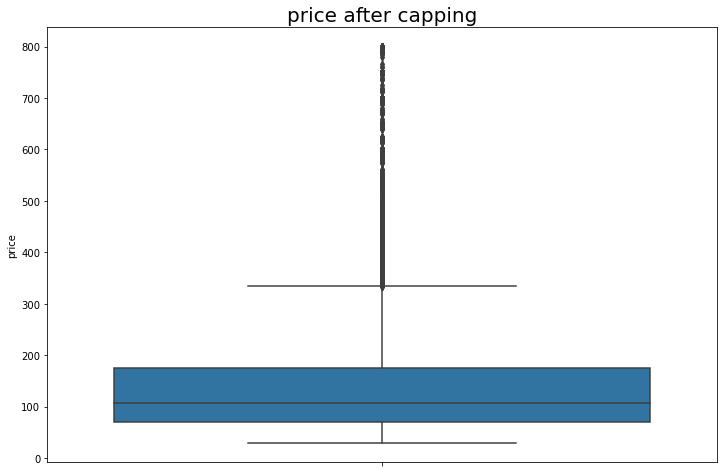

In [166]:
plt.figure(figsize=(12,8))
sns.boxplot(y='price',data=df)
plt.title('price after capping',size=20)

In [171]:
# removing listing with prices at 0 because it is unlikely
df = df[df["price"] > 0]

Text(0.5, 1.0, 'Review per month after capping')

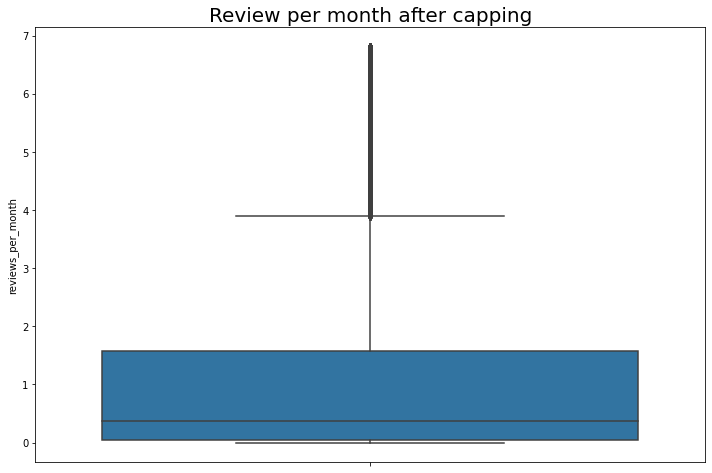

In [172]:
plt.figure(figsize=(12,8))
sns.boxplot(y='reviews_per_month',data=df)
plt.title('Review per month after capping',size=20)

Text(0.5, 1.0, 'minimum nights after capping')

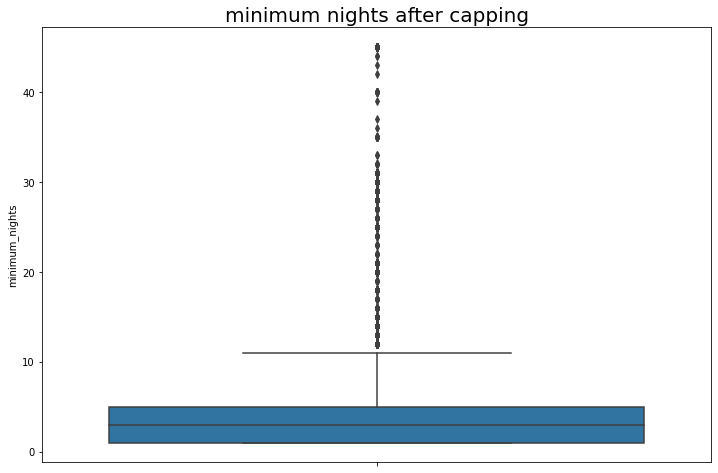

In [169]:
plt.figure(figsize=(12,8))
sns.boxplot(y='minimum_nights',data=df)
plt.title('minimum nights after capping',size=20)

Text(0.5, 1.0, 'number of reviews after capping')

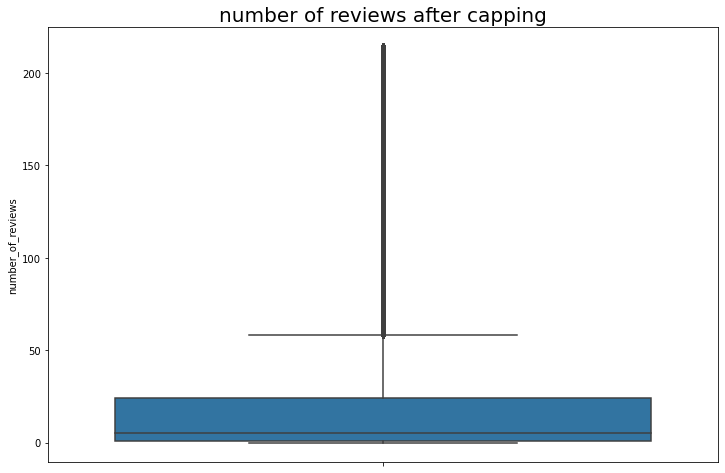

In [170]:
plt.figure(figsize=(12,8))
sns.boxplot(y='number_of_reviews',data=df)
plt.title('number of reviews after capping',size=20)

In [173]:
df.to_csv("NYC_CLEANED.csv", index=False)